In [1278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1279]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1280]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072126 entries, 0 to 1072125
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1072126 non-null  int64  
 1   kWh       1072126 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.4 MB


In [1281]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1072121    0.13
1072122    0.12
1072123    0.13
1072124    0.13
1072125    0.13
Name: kWh, Length: 1072126, dtype: float64

In [1282]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1072121    0.13
1072122    0.12
1072123    0.13
1072124    0.13
1072125    0.13
Name: kWh, Length: 1072126, dtype: float64

In [1283]:
l=len(conso_data)-1
l

1072125

In [1284]:
conso_data['sec']=conso_data['Interval']/1000


In [1285]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1286]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1287]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072126 entries, 0 to 1072125
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1072126 non-null  int64  
 1   kWh        1072126 non-null  float64
 2   sec        1072126 non-null  float64
 3   Wh         1072126 non-null  float64
 4   cumul(ms)  1072126 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 40.9 MB


In [1288]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1072121,28442,0.13,28.442,126.573377,24631259524
1072122,28655,0.12,28.655,125.632525,24631288179
1072123,28386,0.13,28.386,126.823082,24631316565
1072124,28357,0.13,28.357,126.952781,24631344922
1072125,28395,0.13,28.395,126.782884,24631373317


In [1289]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

24631373317000

In [1290]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 35, 42, 599872)

In [1291]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1292]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1293]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1294]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:36:04.533872,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:36:26.391872,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:36:48.392872,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:37:10.320872,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:37:32.211872,21/08/23
...,...,...,...,...,...,...,...
1072121,28442,0.13,28.442,126.573377,24631259524,2024-06-01 20:36:42.123872,01/06/24
1072122,28655,0.12,28.655,125.632525,24631288179,2024-06-01 20:37:10.778872,01/06/24
1072123,28386,0.13,28.386,126.823082,24631316565,2024-06-01 20:37:39.164872,01/06/24
1072124,28357,0.13,28.357,126.952781,24631344922,2024-06-01 20:38:07.521872,01/06/24


In [1295]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('01/06/24', 6, 2024)

In [1296]:
here = now.strftime('%H:%M:%S')
here

'20:39:04'

In [1297]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1298]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
1068994,27655,0.13,27.655,130.175375,24557066487,2024-06-01 00:00:09.086872,01/06/24
1068995,26279,0.14,26.279,136.991514,24557092766,2024-06-01 00:00:35.365872,01/06/24
1068996,25681,0.14,25.681,140.181457,24557118447,2024-06-01 00:01:01.046872,01/06/24
1068997,25862,0.14,25.862,139.200371,24557144309,2024-06-01 00:01:26.908872,01/06/24
1068998,26048,0.14,26.048,138.206388,24557170357,2024-06-01 00:01:52.956872,01/06/24
...,...,...,...,...,...,...,...
1072121,28442,0.13,28.442,126.573377,24631259524,2024-06-01 20:36:42.123872,01/06/24
1072122,28655,0.12,28.655,125.632525,24631288179,2024-06-01 20:37:10.778872,01/06/24
1072123,28386,0.13,28.386,126.823082,24631316565,2024-06-01 20:37:39.164872,01/06/24
1072124,28357,0.13,28.357,126.952781,24631344922,2024-06-01 20:38:07.521872,01/06/24


In [1299]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1300]:
data = list(df_grp['kWh'])
print(data)


[0.906, 3.699, 4.216, 3.701, 4.214, 4.624, 3.479, 3.398, 3.526, 3.683, 3.849, 3.713, 4.258, 3.862, 3.411, 3.632, 3.325, 3.455, 4.235, 4.021, 4.062, 3.939, 3.425, 4.446, 3.699, 3.817, 4.425, 4.66, 3.715, 3.224, 3.175, 4.056, 3.621, 3.187, 3.791, 4.172, 3.745, 3.557, 4.817, 4.173, 4.533, 3.775, 3.376, 4.319, 3.881, 3.885, 3.427, 4.084, 3.645, 3.398, 4.109, 3.403, 3.897, 3.823, 3.648, 3.744, 4.244, 3.284, 3.887, 2.951, 2.055, 2.041, 2.487, 4.085, 3.741, 4.325, 3.64, 3.89, 3.746, 3.97, 3.923, 4.147, 3.663, 3.174, 3.756, 3.539, 3.597, 3.703, 3.69, 3.225, 3.909, 3.267, 3.748, 3.589, 4.103, 3.671, 3.259, 3.827, 4.118, 4.335, 4.09, 4.001, 4.21, 3.743, 3.933, 3.878, 3.909, 3.764, 4.023, 4.342, 3.875, 3.531, 3.669, 3.661, 3.339, 3.857, 3.984, 4.12, 3.464, 4.179, 3.608, 4.135, 4.484, 3.696, 3.407, 3.593, 4.209, 3.63, 4.081, 3.985, 3.752, 3.584, 5.146, 3.69, 3.766, 4.298, 4.082, 4.789, 4.396, 3.928, 3.819, 4.38, 4.613, 4.252, 4.778, 4.339, 3.658, 4.246, 3.685, 3.601, 3.528, 3.98, 3.626, 3.79, 3.59

In [1301]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1302]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [1303]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [1304]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.315134
dtype: float64

In [1305]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.748692
dtype: float64

In [1306]:
last=df_grp.iloc[-1]['kWh']
last

3.132

<Axes: xlabel='heure'>

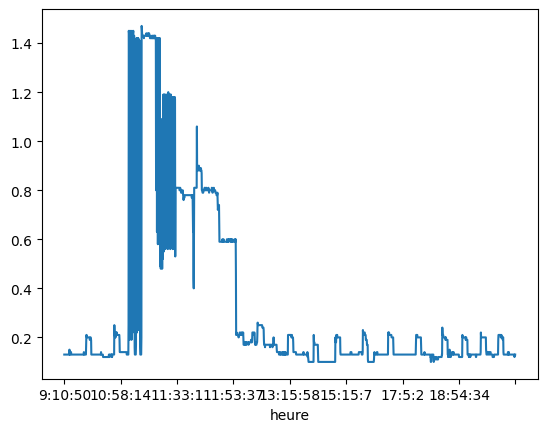

In [1307]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [1308]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:9',
             days   kWh
  heure                
  0:0:9  01/06/24  0.13),
 ('0:0:35',
              days   kWh
  heure                 
  0:0:35  01/06/24  0.14),
 ('0:1:1',
             days   kWh
  heure                
  0:1:1  01/06/24  0.14),
 ('0:1:26',
              days   kWh
  heure                 
  0:1:26  01/06/24  0.14),
 ('0:1:52',
              days   kWh
  heure                 
  0:1:52  01/06/24  0.14),
 ('0:2:19',
              days   kWh
  heure                 
  0:2:19  01/06/24  0.14),
 ('0:2:45',
              days   kWh
  heure                 
  0:2:45  01/06/24  0.14),
 ('0:3:11',
              days   kWh
  heure                 
  0:3:11  01/06/24  0.14),
 ('0:3:38',
              days   kWh
  heure                 
  0:3:38  01/06/24  0.14),
 ('0:4:4',
             days   kWh
  heure                
  0:4:4  01/06/24  0.14),
 ('0:4:30',
              days   kWh
  heure                 
  0:4:30  01/06/24  0.14),
 ('0:4:57',
              days   

In [1309]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:9',
  heure
  0:0:9    0.13
  Name: kWh, dtype: float64),
 ('0:0:35',
  heure
  0:0:35    0.14
  Name: kWh, dtype: float64),
 ('0:1:1',
  heure
  0:1:1    0.14
  Name: kWh, dtype: float64),
 ('0:1:26',
  heure
  0:1:26    0.14
  Name: kWh, dtype: float64),
 ('0:1:52',
  heure
  0:1:52    0.14
  Name: kWh, dtype: float64),
 ('0:2:19',
  heure
  0:2:19    0.14
  Name: kWh, dtype: float64),
 ('0:2:45',
  heure
  0:2:45    0.14
  Name: kWh, dtype: float64),
 ('0:3:11',
  heure
  0:3:11    0.14
  Name: kWh, dtype: float64),
 ('0:3:38',
  heure
  0:3:38    0.14
  Name: kWh, dtype: float64),
 ('0:4:4',
  heure
  0:4:4    0.14
  Name: kWh, dtype: float64),
 ('0:4:30',
  heure
  0:4:30    0.14
  Name: kWh, dtype: float64),
 ('0:4:57',
  heure
  0:4:57    0.14
  Name: kWh, dtype: float64),
 ('0:5:16',
  heure
  0:5:16    0.19
  Name: kWh, dtype: float64),
 ('0:5:33',
  heure
  0:5:33    0.22
  Name: kWh, dtype: float64),
 ('0:5:50',
  heure
  0:5:50    0.21
  Name: kWh, dtype: float64),
 

In [1310]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [1311]:
df.iloc[0].dates

Timestamp('2024-06-01 00:00:09.086872')

In [1312]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1313]:
df.dates.dt.time

heure
0:0:9       00:00:09.086872
0:0:35      00:00:35.365872
0:1:1       00:01:01.046872
0:1:26      00:01:26.908872
0:1:52      00:01:52.956872
                 ...       
20:36:42    20:36:42.123872
20:37:10    20:37:10.778872
20:37:39    20:37:39.164872
20:38:7     20:38:07.521872
20:38:35    20:38:35.916872
Name: dates, Length: 3132, dtype: object

In [1314]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-01 00:00:09.086872	2024-06-01 08:22:46.225872	8h 22m 37s 	1000
2024-06-01 08:22:46.225872	2024-06-01 12:26:52.739872	4h 4m 6s 	2000
2024-06-01 12:26:52.739872	2024-06-01 19:42:12.409872	7h 15m 19s 	3000
2024-06-01 19:42:12.409872	2024-06-01 20:38:35.916872	0h 56m 23s 	132


In [1315]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('20:39:04', 3.132, 3132)

In [1316]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [1317]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 21/08/23 to 01/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     286 non-null    float64
dtypes: float64(1)
memory usage: 4.5+ KB


In [1318]:
df_grp.to_csv('df_grp.csv')

In [1319]:
df_grp.tail(7)

,kWh
days,
26/05/24,3.377
27/05/24,3.758
28/05/24,3.552
29/05/24,3.092
30/05/24,3.286
31/05/24,4.152
01/06/24,3.132


Text(0.5, 1.0, 'Week conso')

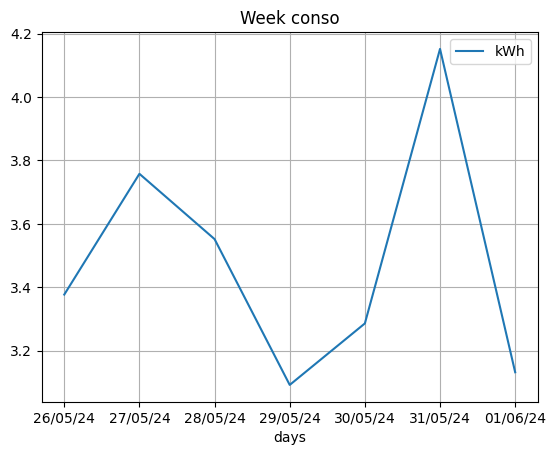

In [1320]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')

In [1321]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [1322]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


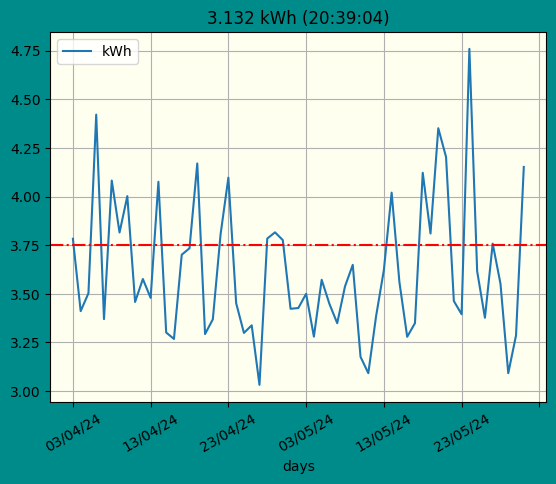

In [1323]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")
# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [1324]:
#df_grp.head()
df_grp.tail()

,kWh
days,
28/05/24,3.552
29/05/24,3.092
30/05/24,3.286
31/05/24,4.152
01/06/24,3.132


In [1325]:
df_grp.mean()

kWh    3.748692
dtype: float64

In [1326]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 1068994 to 1072125
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3132 non-null   int64         
 1   kWh        3132 non-null   float64       
 2   sec        3132 non-null   float64       
 3   Wh         3132 non-null   float64       
 4   cumul(ms)  3132 non-null   int64         
 5   dates      3132 non-null   datetime64[ns]
 6   days       3132 non-null   object        
 7   heure      3132 non-null   object        
 8   hours      3132 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 244.7+ KB


In [1327]:
day

'01/06/24'

In [1328]:

# group conso by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1068994    00  0.13
  1068995    00  0.14
  1068996    00  0.14
  1068997    00  0.14
  1068998    00  0.14
  ...       ...   ...
  1069119    00  0.22
  1069120    00  0.18
  1069121    00  0.18
  1069122    00  0.18
  1069123    00  0.18
  
  [130 rows x 2 columns]),
 ('01',
          hours   kWh
  1069124    01  0.18
  1069125    01  0.18
  1069126    01  0.18
  1069127    01  0.18
  1069128    01  0.18
  ...       ...   ...
  1069239    01  0.17
  1069240    01  0.15
  1069241    01  0.10
  1069242    01  0.10
  1069243    01  0.10
  
  [120 rows x 2 columns]),
 ('02',
          hours   kWh
  1069244    02  0.10
  1069245    02  0.11
  1069246    02  0.10
  1069247    02  0.10
  1069248    02  0.10
  ...       ...   ...
  1069351    02  0.10
  1069352    02  0.10
  1069353    02  0.10
  1069354    02  0.10
  1069355    02  0.10
  
  [112 rows x 2 columns]),
 ('03',
          hours  kWh
  1069356    03  0.1
  1069357    03  0.1
  1069358    03  0.1
  

In [1329]:
groupedbyhour.count()


,kWh
hours,
00,130
01,120
02,112
03,114
04,113
05,111
06,111
07,115
08,175


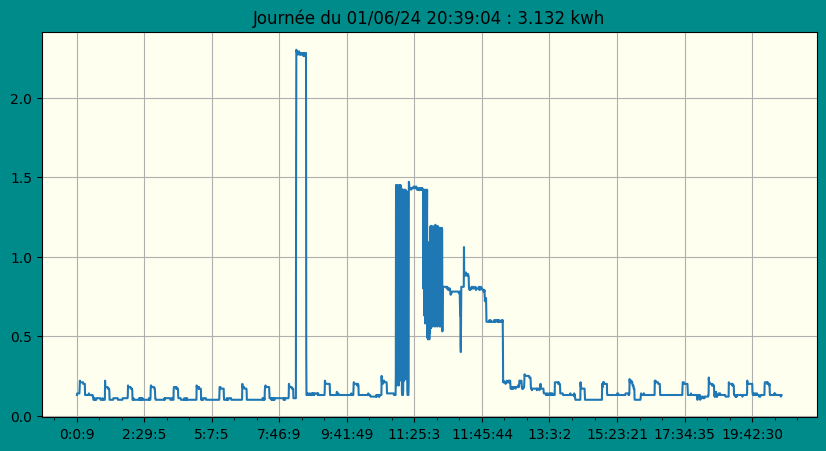

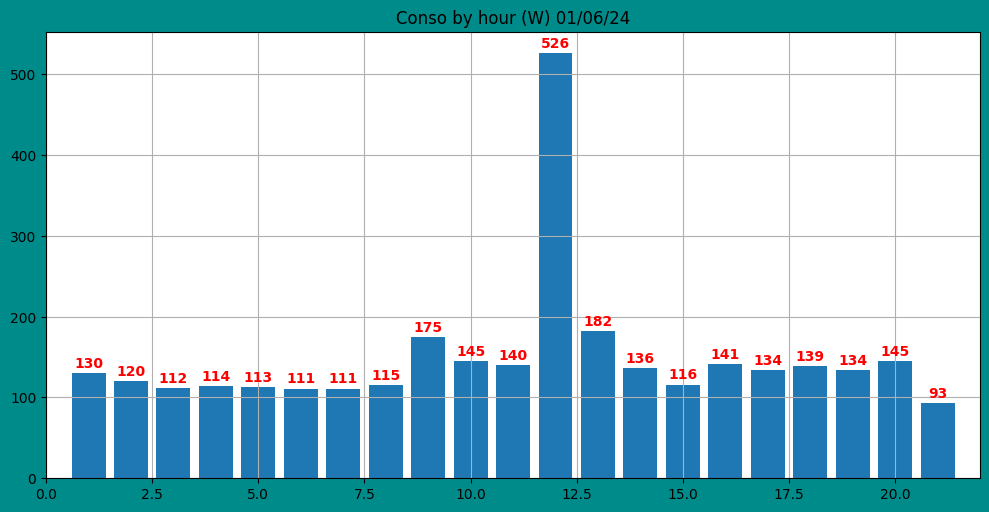

In [1330]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1331]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:z
    pickle.dump(data, file)

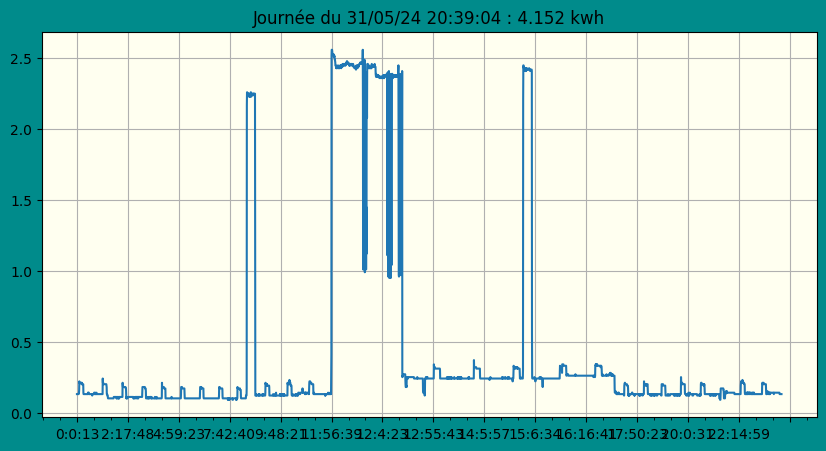

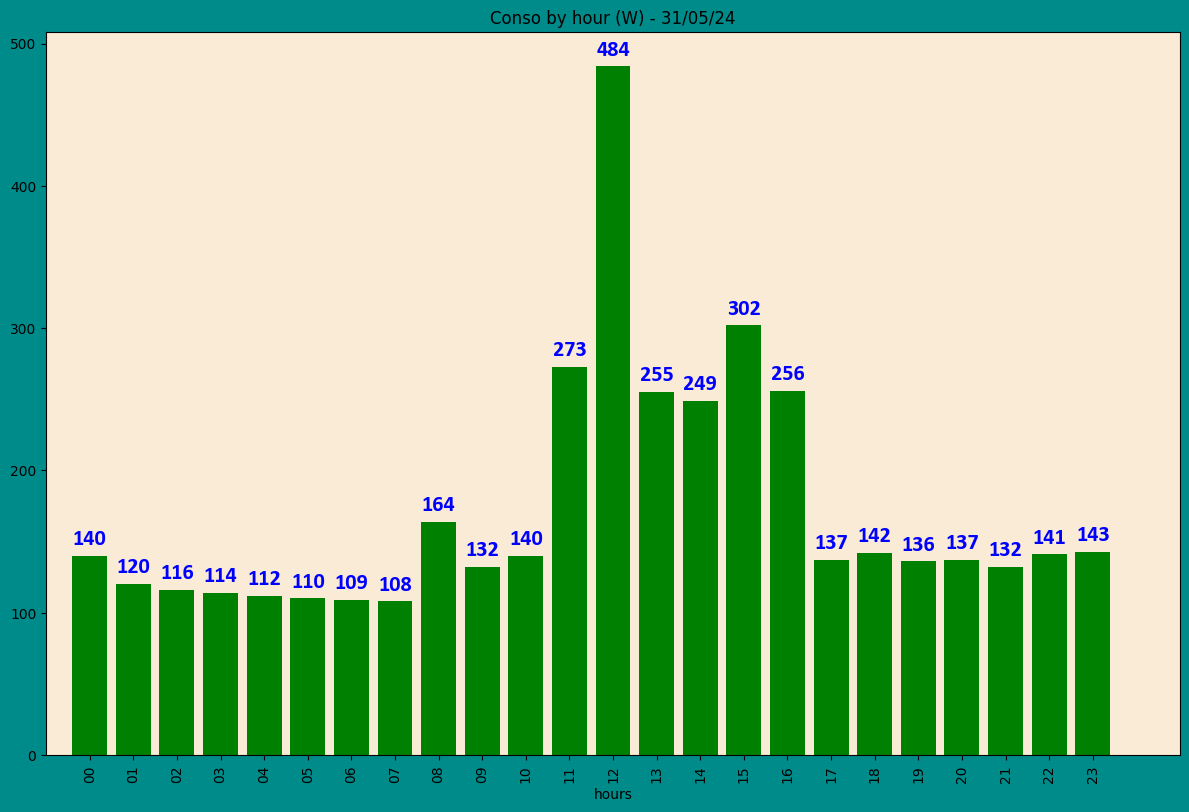

In [1332]:
# plot any day
day = '31/05/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)